# Evaluación sesión 4.

Utilizando Pandas, carga el siguiente dataset CSV que contiene datos de ventas: 

{download}`Datos de ventas de videojuegos<./vgsales.csv>`.

1. Una vez cargado el dataset, realiza las siguientes tareas:

- Muestra las primeras diez filas del dataset.

In [1]:
import pandas as pd

tableVentas = pd.read_csv('./vgsales.csv')

print(tableVentas.head(10))

   Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29

- Calcula el total de ventas globales para cada juego y añade este resultado como una nueva columna en el DataFrame.

In [2]:
tableVentas['Venta_Global'] = tableVentas['NA_Sales'] + tableVentas['EU_Sales'] + tableVentas['JP_Sales'] + tableVentas['Other_Sales']

print(tableVentas.head(10))

   Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Venta_Global  
0     41.49     29.02      3.77         8.46         82

- Filtra y muestra solo aquellos juegos que han vendido más de 20 millones de copias globalmente.

In [3]:
ventasAltas = tableVentas[ tableVentas['Venta_Global'] > 20]

print(ventasAltas)

    Rank                                          Name Platform    Year  \
0      1                                    Wii Sports      Wii  2006.0   
1      2                             Super Mario Bros.      NES  1985.0   
2      3                                Mario Kart Wii      Wii  2008.0   
3      4                             Wii Sports Resort      Wii  2009.0   
4      5                      Pokemon Red/Pokemon Blue       GB  1996.0   
5      6                                        Tetris       GB  1989.0   
6      7                         New Super Mario Bros.       DS  2006.0   
7      8                                      Wii Play      Wii  2006.0   
8      9                     New Super Mario Bros. Wii      Wii  2009.0   
9     10                                     Duck Hunt      NES  1984.0   
10    11                                    Nintendogs       DS  2005.0   
11    12                                 Mario Kart DS       DS  2005.0   
12    13                 

2. Genera 2 gráficas usando matplotlib de algún aspecto que encuentres interesante de esta tabla.

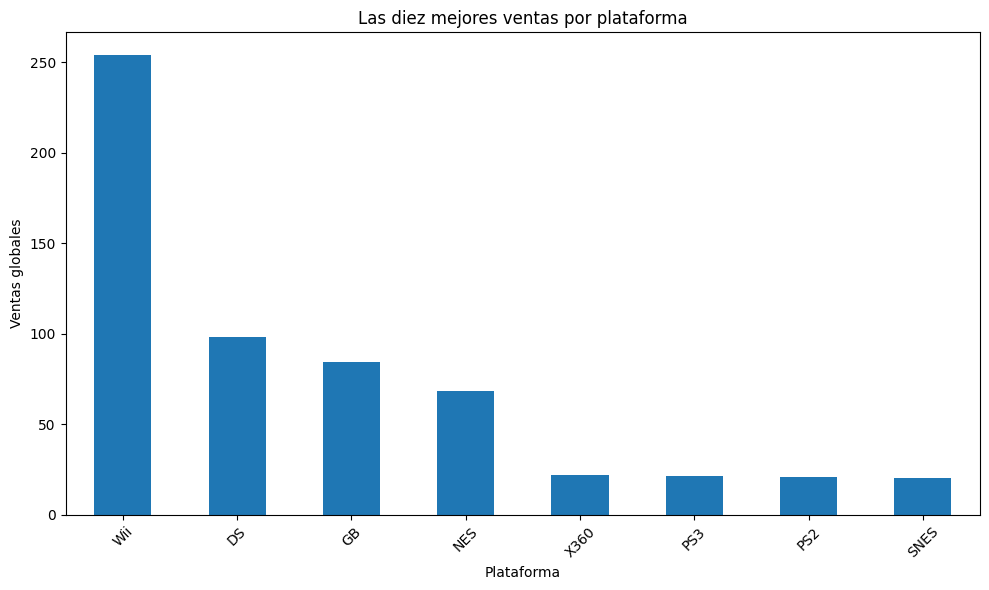

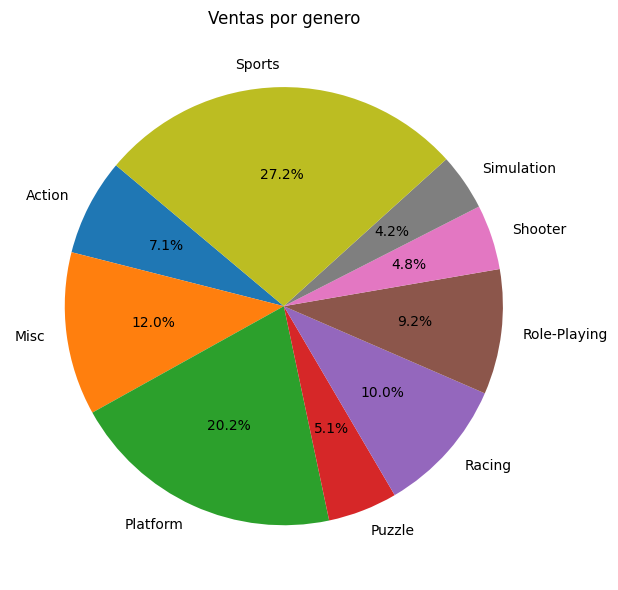

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

tableVentas = pd.read_csv('./vgsales.csv')

tableVentas['Venta_Global'] = tableVentas['NA_Sales'] + tableVentas['EU_Sales'] + tableVentas['JP_Sales'] + tableVentas['Other_Sales']

ventasAltas = tableVentas[ tableVentas['Venta_Global'] > 20]

primerosDiez = ventasAltas.groupby('Platform')['Venta_Global'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
primerosDiez.plot(kind='bar')
plt.title('Las diez mejores ventas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

genero = ventasAltas.groupby('Genre')['Venta_Global'].sum()
plt.figure(figsize=(10, 6))
genero.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Ventas por genero')
plt.ylabel('')
plt.tight_layout()
plt.show()
